In [1]:
import numpy as np

# ------------------------------------

# a way to make pytorch not crashing the python kernel in jupyter notebook
# probally not have to do this in the newest version of cuda.

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' 

# -------------------------------------

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
# display.set_matplotlib_formats('svg')


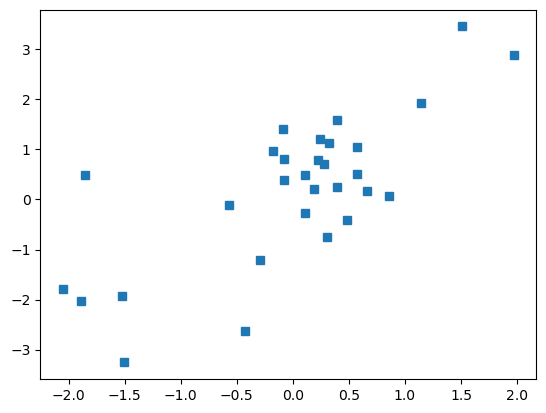

In [3]:
# create data
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) # plus element each according to its row

plt.plot(x, y, 's') # display in samples
plt.show()

In [5]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
1
NVIDIA GeForce RTX 3050 Laptop GPU


In [6]:
# model architecture: 

# Xây dựng mạng nơ-ron tuần tự với 2 layer tuyến tính và một hàm kích hoạt ReLU
regressionModel = nn.Sequential(
    nn.Linear(1, 1),  # (input (points - x coordinate to get the goal of output y) )
    nn.ReLU(),        
    nn.Linear(1, 1)   
)

# ---> what if we don't have a NON LINEAR activation function for the output?
# --> means the output will be LINEAR
# --> it's fine for simple regression problem like this

In [8]:
learningRate = .05

lossfunc = nn.MSELoss() # mean squared error as loss function for regression problem

# we want to optimize the parameters of the regression model to make it predict better
# using gradient descent
optimizer = torch.optim.SGD(
    params= regressionModel.parameters(),
    lr=learningRate
)

In [9]:
# training the model

numEpochs = 500
losses = torch.zeros(numEpochs) # storing 500 loss values of each epoch inside this tensor (array) to visualize later

for epochi in range(numEpochs):
    # forward pass 
    yHat = regressionModel(x) # passing the all points into the model, that's means in an epoch it process the whole dataset
    # output yHat = [,,,]

    # compute loss
    loss = lossfunc(yHat, y) # average loss of whole dataset
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  

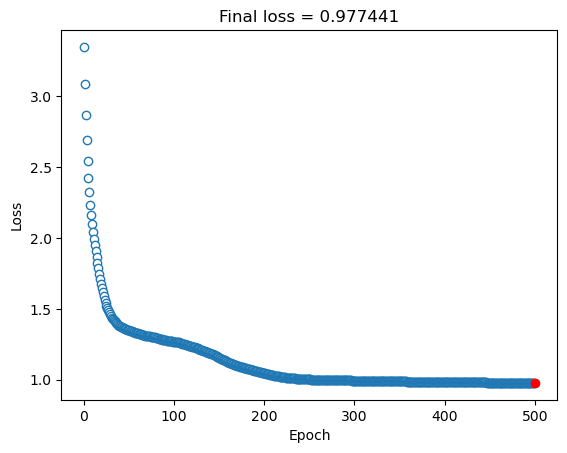

In [10]:
# show the losses

# manually compute losses
# final forward pass, this time we call "predictions" not yHat anymore since we're not training here
predictions = regressionModel(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean() # test lost here is only one MEAN value of all the data points (whole dataset)

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numEpochs ,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [11]:
testloss.item()

0.9774411916732788

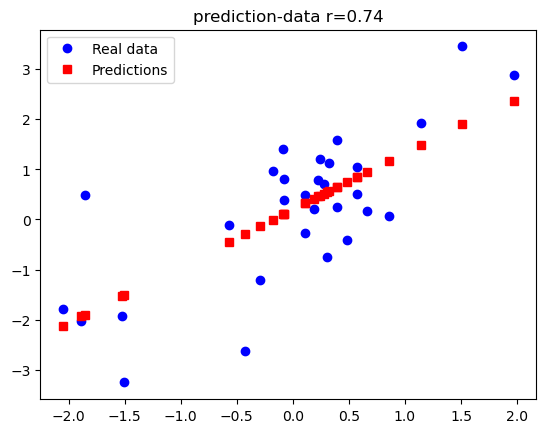

In [12]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()